In [ ]:
from pdf2image import convert_from_path
import os

pdf_path = '/data/ymai/datasets/work1/SDNK-03.pdf'  # 替换成你的 PDF 路径
output_folder = 'output_images'  # 输出文件夹

# 创建输出文件夹
os.makedirs(output_folder, exist_ok=True)

# 转换 PDF
pages = convert_from_path(pdf_path, dpi=300)

# 保存每一页为图片
for i, page in enumerate(pages):
    image_path = os.path.join(output_folder, f'page_{i-3}.png')
    page.save(image_path, 'PNG')
    print(f'保存: {image_path}')


In [2]:
import os
from openai import OpenAI


os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'

client = OpenAI(
    api_key="sk-b7a82560100f44adb46b0bbb4970bc1e",  # 替换成你的 key
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

# 图像 URL 模板（GitHub 上的图床注意：要换成 raw 链接！）
image_base_url = "https://work1-image-1353004063.cos.ap-nanjing.myqcloud.com/work1-image-1353004063/SDNK-03//page_{}.png"

# 你要处理的图片数量
num_images = 73  # 举例为前 5 页，你可以修改为任意数字

# 输出文件
output_file = "results.txt"

# 写入结果文件
with open(output_file, "w", encoding="utf-8") as f:
    for i in range(1, num_images + 1):
        image_url = image_base_url.format(i)
        print(f"正在处理图片: page_{i}.png")

        try:
            completion = client.chat.completions.create(
                model="qwen-vl-max-latest",
                messages=[
                    {"role": "system", "content": [{"type": "text", "text": "You are a helpful assistant."}]},
                    {
                        "role": "user",
                        "content": [
                            {"type": "image_url", "image_url": {"url": image_url}},
                            {"type": "text", "text": "准确地描述这幅流程图的执行流，只需要提取出执行流，不要附加任何多余的说明性的文字描述。"},
                        ],
                    },
                ],
            )

            result = completion.choices[0].message.content.strip()
            f.write(f"--- page_{i}.png ---\n")
            f.write(result + "\n\n")
            print(f"✅ 完成 page_{i}.png")

        except Exception as e:
            print(f"❌ 失败 page_{i}.png: {e}")
            f.write(f"--- page_{i}.png ---\n")
            f.write(f"[错误]: {e}\n\n")


正在处理图片: page_1.png
✅ 完成 page_1.png
正在处理图片: page_2.png
✅ 完成 page_2.png
正在处理图片: page_3.png
✅ 完成 page_3.png
正在处理图片: page_4.png
✅ 完成 page_4.png
正在处理图片: page_5.png
✅ 完成 page_5.png
正在处理图片: page_6.png
✅ 完成 page_6.png
正在处理图片: page_7.png
✅ 完成 page_7.png
正在处理图片: page_8.png
✅ 完成 page_8.png
正在处理图片: page_9.png
✅ 完成 page_9.png
正在处理图片: page_10.png
✅ 完成 page_10.png
正在处理图片: page_11.png
✅ 完成 page_11.png
正在处理图片: page_12.png
✅ 完成 page_12.png
正在处理图片: page_13.png
✅ 完成 page_13.png
正在处理图片: page_14.png
✅ 完成 page_14.png
正在处理图片: page_15.png
✅ 完成 page_15.png
正在处理图片: page_16.png
✅ 完成 page_16.png
正在处理图片: page_17.png
✅ 完成 page_17.png
正在处理图片: page_18.png
✅ 完成 page_18.png
正在处理图片: page_19.png
✅ 完成 page_19.png
正在处理图片: page_20.png
✅ 完成 page_20.png
正在处理图片: page_21.png
✅ 完成 page_21.png
正在处理图片: page_22.png
✅ 完成 page_22.png
正在处理图片: page_23.png
✅ 完成 page_23.png
正在处理图片: page_24.png
✅ 完成 page_24.png
正在处理图片: page_25.png
✅ 完成 page_25.png
正在处理图片: page_26.png
✅ 完成 page_26.png
正在处理图片: page_27.png
✅ 完成 page_27.png
正在处理图片: page_28.png

In [6]:
import os
from openai import OpenAI


os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'

client = OpenAI(
    api_key="sk-b7a82560100f44adb46b0bbb4970bc1e",  # 替换成你的 key
    base_url="https://dashscope.aliyuncs.com/compatible-mode/v1",
)

# 图像 URL 模板（GitHub 上的图床注意：要换成 raw 链接！）
image_base_url = "https://work1-image-1353004063.cos.ap-nanjing.myqcloud.com/work1-image-1353004063/SDNK-03//page_{}.png"

# 你要处理的图片数量
num_images = 73  # 举例为前 5 页，你可以修改为任意数字

# 输出文件
output_file = "title_results.txt"

# 写入结果文件
with open(output_file, "w", encoding="utf-8") as f:
    for i in range(1, num_images + 1):
        image_url = image_base_url.format(i)
        print(f"正在处理图片: page_{i}.png")

        try:
            completion = client.chat.completions.create(
                model="qwen-vl-max-latest",
                messages=[
                    {"role": "system", "content": [{"type": "text", "text": "You are a helpful assistant."}]},
                    {
                        "role": "user",
                        "content": [
                            {"type": "image_url", "image_url": {"url": image_url}},
                            {"type": "text", "text": "准确地提取出这幅流程图的标题，不要附加任何多余的说明性的文字描述。"},
                        ],
                    },
                ],
            )

            result = completion.choices[0].message.content.strip()
            f.write(f"--- page_{i}.png ---\n")
            f.write(result + "\n\n")
            print(f"✅ 完成 page_{i}.png")

        except Exception as e:
            print(f"❌ 失败 page_{i}.png: {e}")
            f.write(f"--- page_{i}.png ---\n")
            f.write(f"[错误]: {e}\n\n")


正在处理图片: page_1.png
✅ 完成 page_1.png
正在处理图片: page_2.png
✅ 完成 page_2.png
正在处理图片: page_3.png
✅ 完成 page_3.png
正在处理图片: page_4.png
✅ 完成 page_4.png
正在处理图片: page_5.png
✅ 完成 page_5.png
正在处理图片: page_6.png
✅ 完成 page_6.png
正在处理图片: page_7.png
✅ 完成 page_7.png
正在处理图片: page_8.png
✅ 完成 page_8.png
正在处理图片: page_9.png
✅ 完成 page_9.png
正在处理图片: page_10.png
✅ 完成 page_10.png
正在处理图片: page_11.png
✅ 完成 page_11.png
正在处理图片: page_12.png
✅ 完成 page_12.png
正在处理图片: page_13.png
✅ 完成 page_13.png
正在处理图片: page_14.png
✅ 完成 page_14.png
正在处理图片: page_15.png
✅ 完成 page_15.png
正在处理图片: page_16.png
✅ 完成 page_16.png
正在处理图片: page_17.png
✅ 完成 page_17.png
正在处理图片: page_18.png
✅ 完成 page_18.png
正在处理图片: page_19.png
✅ 完成 page_19.png
正在处理图片: page_20.png
✅ 完成 page_20.png
正在处理图片: page_21.png
✅ 完成 page_21.png
正在处理图片: page_22.png
✅ 完成 page_22.png
正在处理图片: page_23.png
✅ 完成 page_23.png
正在处理图片: page_24.png
✅ 完成 page_24.png
正在处理图片: page_25.png
✅ 完成 page_25.png
正在处理图片: page_26.png
✅ 完成 page_26.png
正在处理图片: page_27.png
✅ 完成 page_27.png
正在处理图片: page_28.png

In [13]:
def insert_next_line_from_A_into_B(a_path, b_path, output_path):
    with open(a_path, 'r', encoding='utf-8') as f_a, open(b_path, 'r', encoding='utf-8') as f_b:
        a_lines = f_a.readlines()
        b_lines = f_b.readlines()

    j = 0  # B 的当前扫描位置

    while j < len(b_lines):
        match_found = False
        a_index = 0

        while a_index < len(a_lines) - 1:  # 保证 A[i+1] 合法
            a_line = a_lines[a_index].rstrip('\n')
            if not a_line:  # 跳过空行
                a_index += 1
                continue

            if j >= len(b_lines):  # 防止 B 中超出范围
                break

            b_line = b_lines[j].rstrip('\n')
            if not b_line:  # 跳过空行
                j += 1
                continue

            if a_line == b_line:
                insert_line = a_lines[a_index + 1].rstrip('\n') + '\n'
                b_lines.insert(j + 1, insert_line)
                j += 2  # 插入后跳过新插入的下一行
                match_found = True
                break  # 重新从 A 开头查
            a_index += 1

        if not match_found:
            j += 1  # B 向后走一步

    with open(output_path, 'w', encoding='utf-8') as f_out:
        f_out.writelines(b_lines)

# 示例调用
insert_next_line_from_A_into_B('title_results.txt', 'results_c.txt', 'results_modified.txt')


findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font family 'Arial' not found.
findfont: Font f

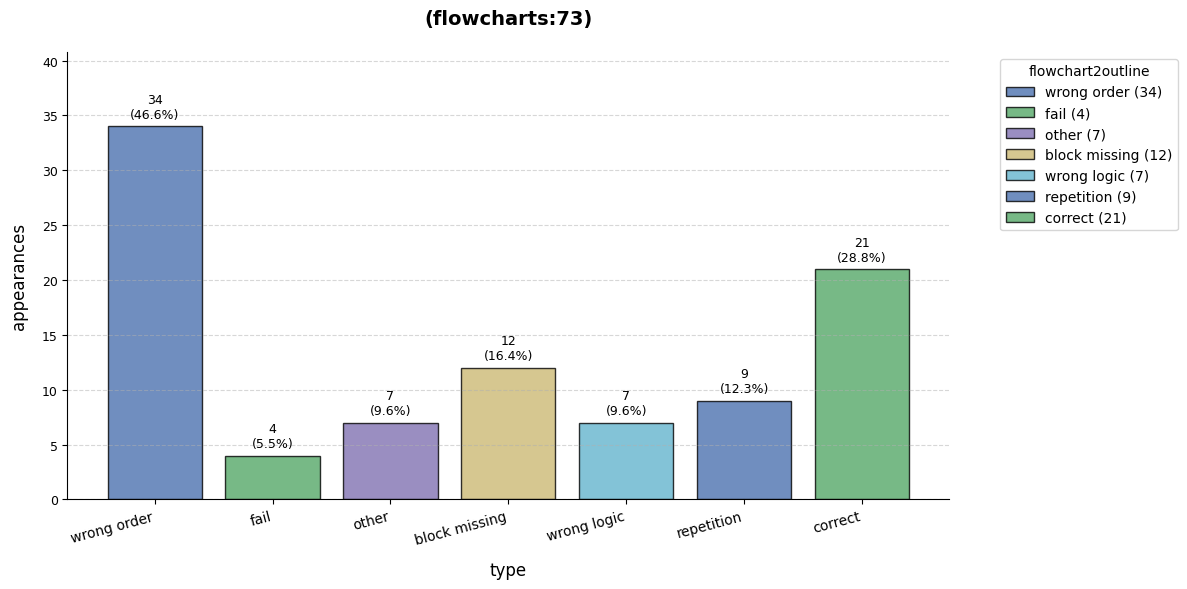

In [2]:
import matplotlib.pyplot as plt


# 模拟数据（替换为你的实际数据）
error_counts = {
    'wrong order': 34,
    'fail': 4,
    'other': 7,
    'block missing': 12,
    'wrong logic': 7,
    'repetition': 9,
    'correct': 21
}

# 计算总数和百分比
total = 73
percentages = {k: f"{(v/total)*100:.1f}%" for k, v in error_counts.items()}


# 初始化画布
plt.figure(figsize=(12, 6))
bars = plt.bar(error_counts.keys(), 
               error_counts.values(),
               color=['#4C72B0', '#55A868', '#8172B2', '#CCB974', '#64B5CD'],  # 多色方案
               edgecolor='black',
               alpha=0.8)

# 标签添加（修复KeyError的核心修改）
for bar, label in zip(bars, error_counts.keys()):  # 显式绑定数据标签
    height = bar.get_height()
    label_x = bar.get_x() + bar.get_width() / 2
    plt.text(label_x, height + 0.5, 
             f"{height}\n({percentages[label]})",  # 直接使用字典键
             ha='center', 
             va='bottom',
             fontsize=9,
             fontfamily='Arial')

# 图表装饰
plt.title(f"(flowcharts:{total})", 
          fontsize=14, pad=20, fontweight='bold')
plt.xlabel("type", fontsize=12, labelpad=10)
plt.ylabel("appearances", fontsize=12, labelpad=10)

# 坐标轴优化
plt.ylim(0, max(error_counts.values()) * 1.2)  # 增加顶部空间
plt.xticks(rotation=15, ha='right', fontsize=10)  # 标签旋转防重叠
plt.yticks(fontsize=9)
plt.grid(axis='y', linestyle='--', alpha=0.5)

# 添加辅助元素
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# 可选：添加图例（安全方式）
legend_labels = [f"{k} ({v})" for k, v in error_counts.items()]
plt.legend(bars, legend_labels, 
           title='flowchart2outline',
           bbox_to_anchor=(1.05, 1), 
           loc='upper left')

# 输出控制
plt.tight_layout()
plt.show()

# 保存图片（取消注释使用）
# plt.savefig('error_analysis.png', dpi=300, bbox_inches='tight')



In [5]:
import os
os.environ['http_proxy'] = 'http://127.0.0.1:7890'
os.environ['https_proxy'] = 'http://127.0.0.1:7890'